In [22]:
import torch
from torchvision import models
import os, glob
import torch.nn as nn
import matplotlib.pyplot as plt
import cv2 as cv
from PIL import Image

In [6]:
test_images = glob.glob("../data/test/**/*.jpg", recursive=True)

In [7]:
print(len(test_images))

75


In [64]:
model = models.vit_b_16(weights=None)
model.heads.head = nn.Linear(in_features=model.heads.head.in_features, out_features=3)

In [65]:
transforms = models.ViT_B_16_Weights.DEFAULT.transforms()

In [66]:
model.load_state_dict(torch.load("../checkpoints/VisionTransformer_B16_Pretrained/foodvision_mini/02_10_2025_12_25_10/train50/train50.pth"))

<All keys matched successfully>

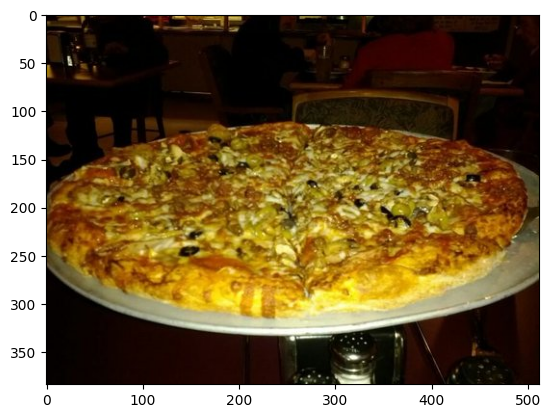

In [67]:
img_path = test_images[0]
img = Image.open(img_path).convert("RGB")
plt.imshow(img)
plt.show()


In [68]:
img = transforms(img)
img = img.unsqueeze(0)
print(img.shape)

torch.Size([1, 3, 224, 224])


In [69]:
with torch.inference_mode():
    preds = model(img)

In [70]:
preds

tensor([[ 4.2189, -2.3696, -1.8702]])

In [71]:
preds.shape

torch.Size([1, 3])

In [72]:
classes = preds.argmax(dim=1)

In [73]:
classes.item()

0

In [74]:
true_cls = os.path.basename(os.path.dirname(img_path))

In [75]:
true_cls

'pizza'